# 4.1 Fashion DNN

In [1]:
from torchvision import datasets,transforms,utils
from torch.utils import data

import matplotlib.pyplot as plt
import numpy as np



import warnings
warnings.filterwarnings('ignore')

In [2]:
transform = transforms.Compose([transforms.ToTensor()])

In [3]:
trainset = datasets.FashionMNIST(root='./data/',train=True,download=True,transform=transform)
testset = datasets.FashionMNIST(root='./data/',train=False,download=True,transform=transform)

In [4]:
batch_size =16

train_loader = data.DataLoader(dataset=trainset,batch_size=batch_size)
test_loader = data.DataLoader(dataset=testset,batch_size=batch_size)

In [5]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

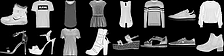

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9])


In [25]:
img = utils.make_grid(images,padding=0)
tf = transforms.ToPILImage()
img_t = tf(img)
display(img_t)
print(labels)

# npimg = img.numpy()
# plt.figure(figsize=(10,7))
# plt.imshow(np.transpose(npimg,(1,2,0)))
# plt.show()

In [26]:
CLASSES = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}


for label in labels:
    index = label.item()
    print(CLASSES[index])

Ankle boot
T-shirt/top
T-shirt/top
Dress
T-shirt/top
Pullover
Sneaker
Pullover
Sandal
Sandal
T-shirt/top
Ankle boot
Sandal
Sandal
Sneaker
Ankle boot


In [30]:
idx =1
item_img  = images[idx]
tf =transforms.ToPILImage()
show_img = tf(item_img)
display(show_img)

# 4.2 인공 신경망으로 패션 아이템 분류하기

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, datasets

In [32]:
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")

In [33]:
epochs =30
batch_size = 64

In [34]:
transform = transforms.Compose([
    transforms.ToTensor()
])

In [36]:
trainset = datasets.FashionMNIST(
    root      = './.data/', 
    train     = True,
    download  = True,
    transform = transform
)
testset = datasets.FashionMNIST(
    root      = './.data/', 
    train     = False,
    download  = True,
    transform = transform
)

train_loader = torch.utils.data.DataLoader(
    dataset     = trainset,
    batch_size  = batch_size,
    shuffle     = True,
)
test_loader = torch.utils.data.DataLoader(
    dataset     = testset,
    batch_size  = batch_size,
    shuffle     = True,
)

In [37]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(784,256)
        self.fc2 = nn.Linear(256,128)
        self.fc3 = nn.Linear(128,10)
    def forward(self,x):
        x = x.view(-1,784)
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [39]:
model  = Net().to(DEVICE)

In [40]:
optimizer  = optim.SGD(model.parameters(),lr=0.01)

In [41]:
def train(model,train_loader,optimizer):
    model.train()
    for batch_idx,(data,target) in enumerate(train_loader):
        data, target = data.to(DEVICE), target.to(DEVICE)
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output,target)
        loss.backward()
        optimizer.step()

In [42]:
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(DEVICE), target.to(DEVICE)
            output = model (data)

            test_loss += F.cross_entropy(output,target,reduction='sum').item()

            pred   = output.max(1,keepdim=True)[1]
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct/len(test_loader.dataset)
    return test_loss, test_accuracy

In [45]:
for epoch in range(1,epochs+1):
    train(model,train_loader,optimizer)
    test_loss , test_accuracy = evaluate(model,test_loader)
        
    print('[{}] Test Loss: {:.4f}, Accuracy: {:.2f}%'.format(
          epoch, test_loss, test_accuracy))

[1] Test Loss: 0.5946, Accuracy: 78.43%
[2] Test Loss: 0.5376, Accuracy: 81.22%
[3] Test Loss: 0.5130, Accuracy: 81.64%
[4] Test Loss: 0.5095, Accuracy: 82.09%
[5] Test Loss: 0.4842, Accuracy: 82.75%
[6] Test Loss: 0.4852, Accuracy: 82.85%
[7] Test Loss: 0.4667, Accuracy: 83.28%
[8] Test Loss: 0.4574, Accuracy: 83.80%
[9] Test Loss: 0.4521, Accuracy: 83.67%
[10] Test Loss: 0.4418, Accuracy: 84.27%
[11] Test Loss: 0.4372, Accuracy: 84.48%
[12] Test Loss: 0.4308, Accuracy: 84.55%
[13] Test Loss: 0.4266, Accuracy: 84.94%
[14] Test Loss: 0.4590, Accuracy: 83.37%
[15] Test Loss: 0.4208, Accuracy: 85.03%
[16] Test Loss: 0.4215, Accuracy: 85.16%
[17] Test Loss: 0.4030, Accuracy: 85.61%
[18] Test Loss: 0.4400, Accuracy: 84.79%
[19] Test Loss: 0.4431, Accuracy: 84.49%
[20] Test Loss: 0.4198, Accuracy: 85.01%
[21] Test Loss: 0.3872, Accuracy: 86.32%
[22] Test Loss: 0.3862, Accuracy: 86.04%
[23] Test Loss: 0.3786, Accuracy: 86.50%
[24] Test Loss: 0.3847, Accuracy: 86.45%
[25] Test Loss: 0.4144, A